# Load the data

You can download CIFAR10 dataset from official site:

https://www.cs.toronto.edu/~kriz/cifar.html

or do it using Pytorch:
https://pytorch.org/vision/stable/datasets.html#cifar

or another framework.



In [111]:
import pickle
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Put your code here

!curl -Os https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -zxvf cifar-10-python.tar.gz

classes = ['Самолет', 'Автомобиль', 'Птица', 'Кошка', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1


In [12]:
def unpickle(file):
  with open(file, 'rb') as fo:
    return pickle.load(fo, encoding='bytes')

# проверяем совпадают ли названия классов
list(zip(unpickle("cifar-10-batches-py/batches.meta")[b'label_names'], classes))

[(b'airplane', 'Самолет'),
 (b'automobile', 'Автомобиль'),
 (b'bird', 'Птица'),
 (b'cat', 'Кошка'),
 (b'deer', 'Олень'),
 (b'dog', 'Собака'),
 (b'frog', 'Лягушка'),
 (b'horse', 'Лошадь'),
 (b'ship', 'Корабль'),
 (b'truck', 'Грузовик')]

## Split data into train and validation parts

Extract subset containing train and validation parts. 
Part must contain 5000 and 500 samples respectively.

In [101]:
# Put your code here
batch_1 = unpickle("cifar-10-batches-py/data_batch_1")
data = np.array(batch_1[b'data'])
labels = np.array(batch_1[b'labels'])

np.random.seed(42069)
idxs = np.random.choice(range(labels.size), 5500, replace=False)

# Train data 5000 samples
X_train = data[idxs[:5000]]
y_train = labels[idxs[:5000]]

# Validation data 500 samples
X_val = data[idxs[5000:5500]]
y_val = labels[idxs[5000:5500]]

## Dispaly some images  along with it class names
  


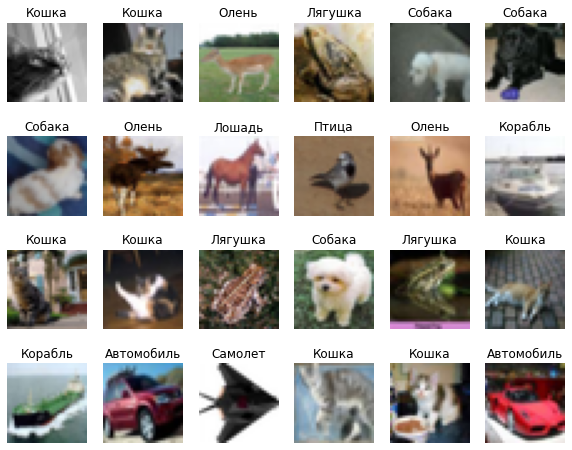

In [102]:
# Put your code here

def reshape_image(img):
  return img.reshape(3, 32, 32).transpose(1,2,0)

fig, axes1 = plt.subplots(4,6, figsize=(10, 8))
for axes in axes1:
  for ax in axes:
    i = np.random.randint(0, data.shape[0])
    ax.set_axis_off()
    ax.imshow(reshape_image(data[i]))
    ax.set_title(classes[labels[i]])

# Implement NearestNeighbor class

In [165]:
class NearestNeighbor:
  def __init__(self, n=1):
    self.X = None
    self.y = None
    self.n = n

  def fit(self, x, y):
    """
      Arguments:
        x  (Tensor or numpy.array): collection of objects from testset (batch)
        y  (Tensor or numpy.array): collection of integer 
        representing a class number for objects from x
    
    """
    self.X = np.array(x, dtype=float)
    self.y = y
  
  def predict(self, x):
    """
      Arguments:
          x  (Tensor or numpy.array): collection of objects from testset (batch)
      
      Returns:
          class_num (Tensor or numpy.array) - collection of integer representing
          class numbers for objects from x             
    """

    # изначально у нас всё в uint8-ах, которые переполняются
    x = np.array(x, dtype=float)
    # эта формула считает дистанции по анологии с (a-b)² = a² - 2ab + b²
    distances = -2 * self.X@x.T + np.sum(x**2, axis=1) + np.sum(self.X**2, axis=1)[:, np.newaxis]
    if self.n == 1:
      return self.y[np.argmin(distances, axis=0)]
    
    # ищим индексы n самых маленьких
    idxs = np.argsort(distances, axis=0)[:self.n,:]
    # выбираем самый популярный вариант
    idx = stats.mode(idxs, axis=0).mode.ravel()
    return self.y[idx]

## Perform smoke test

- Create model instance
- get predictions for dozen of samples


In [160]:
model_nn = NearestNeighbor()
# Put your code here if need 
model_nn.fit(X_train, y_train)
predicted_labels = model_nn.predict(X_val[:10])
for i, label in enumerate(predicted_labels):
  print(classes[label], "vs", classes[y_val[i]])

Самолет vs Корабль
Самолет vs Олень
Птица vs Птица
Олень vs Собака
Собака vs Птица
Корабль vs Грузовик
Собака vs Кошка
Птица vs Птица
Лягушка vs Собака
Самолет vs Самолет


# Validate your model

## Create validation function

Must calculate Accuracy metric for your model.

In [151]:
def validate(model, x, y):
  """
      Arguments:
          model (Object): instance of NearestNeighbor class
          x (Tensor or numpy.array): collection of objects
          y (Tensor or numpy.array): collection of integer representing
          class numbers for objects from x   
      
      Returns:
          accuracy (float) : percentage of correctly classified objects 
  """

  predicted_labels = model.predict(x)
  return (predicted_labels == y).mean()

 ## Calculate model accuracy on validation data

In [161]:
%%time
accuracy = validate(model_nn, X_val, y_val)
print(f"Accuracy {accuracy:.3f}")

Accuracy 0.260
CPU times: total: 2.31 s
Wall time: 842 ms


# Place for brief conclusion
Feel free to describe troubles here.

Почему тут в половине мест заготовки написано `X_val`, а в половине `X_test`?

# Ideas for extra work

- Implenment K-NearestNeighbor ✅
- Test different distance functions
- Find hyperparams using Cross-Validation
- Plot accuracy curve against K ✅
- Evaluate time ✅

## Plot accuracy curve against K

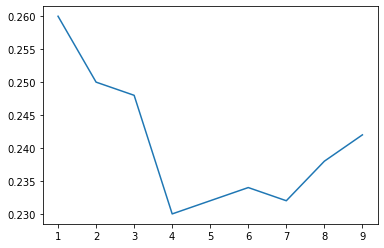

In [164]:
res = []
N = list(range(1, 10))

for i in N:
  model = NearestNeighbor(i)
  model.fit(X_train, y_train)
  res.append(validate(model, X_val, y_val))

plt.plot(N, res)
plt.show()

Почемуто метод только с одним соседом лучше всех 0_0